# **Avila Classification**

**Dataset:** Avila Data set https://archive.ics.uci.edu/ml/datasets/Avila

C. De Stefano, M. Maniaci, F. Fontanella, A. Scotto di Freca, Reliable writer identification in medieval manuscripts through page layout features: The 'Avila' Bible case, Engineering Applications of Artificial Intelligence, Volume 72, 2018, pp. 99-110.

**Code:** Chapter 8 Dimensionality Reduction from `Hands-On Machine Learning with Scikit-Learn and TensorFlow` book (Aurélien Géron)

Predict the writer/copyst from writing characteristics

In [1]:
# Common imports
import numpy as np
import os

import pandas as pd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

## Get the data

### Dataset attributes as described on UCI:
The Avila data set has been extracted from 800 images of the the "Avila Bible", a giant Latin copy of the whole Bible produced during the XII century between Italy and Spain.  
The palaeographic analysis of the  manuscript has  individuated the presence of 12 copyists. The pages written by each copyist are not equally numerous. 
Each pattern contains 10 features and corresponds to a group of 4 consecutive rows.

The prediction task consists in associating each pattern to one of the 12 copyists (labeled as: A, B, C, D, E, F, G, H, I, W, X, Y).
The data have has been normalized, by using the Z-normalization method, and divided in two data sets: a training set containing 10430 samples, and a test set  containing the 10437 samples.

ID      Name    

F1       intercolumnar distance

F2       upper margin 

F3       lower margin 

F4       exploitation 

F5       row number 

F6       modular ratio 

F7       interlinear spacing 

F8       weight 

F9       peak number 

F10     modular ratio/ interlinear spacing

Class: A, B, C, D, E, F, G, H, I, W, X, Y

In [2]:
DATASET_PATH = "dataset"

def load_data(file_path=DATASET_PATH, data_file="data.csv", sep=','):
    csv_path = os.path.join(file_path, data_file)
    return pd.read_csv(csv_path, sep=sep, header=None)

In [3]:
X_train = load_data(data_file="avila-tr.txt")
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345,A
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,A
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,A
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,A
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,F


In [4]:
X_test = load_data(data_file="avila-ts.txt")
X_test.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-3.498799,0.250492,0.232070,1.224178,-4.922215,1.145386,0.182426,-0.165983,-0.123005,1.087144,W
1,0.204355,-0.354049,0.320980,0.410166,-0.989576,-2.218127,0.220177,0.181844,2.090879,-2.009758,A
2,0.759828,-1.304042,-0.023991,-0.973663,-0.006417,-0.349509,-0.421580,-0.450127,0.469443,0.060952,I
3,-0.005490,0.360409,0.281860,-0.213479,-1.168333,-1.013906,-0.346080,1.176165,0.968347,-0.627999,E
4,0.080916,0.101320,0.104040,0.140490,0.261718,0.480988,0.710932,-0.253430,-0.497183,0.155681,A


Rename the attributes as described on UCI:

In [5]:
X_train.rename(columns={0: "F1", 1: "F2", 2: "F3", 3: "F4", 4: "F5", 
                        5: "F6", 6: "F7", 7: "F8", 8: "F9", 9: "F10", 10: "ID"}, inplace=True)

In [6]:
X_test.rename(columns={0: "F1", 1: "F2", 2: "F3", 3: "F4", 4: "F5", 
                        5: "F6", 6: "F7", 7: "F8", 8: "F9", 9: "F10", 10: "ID"}, inplace=True)

Replace the ID-s with unique numbers:

In [7]:
X_train.replace({'A':'1', 'B':'2', 'C':'3', 'D':'4', 'E':'5', 'F':'6',
                 'G':'7', 'H':'8', 'I':'9', 'W':'23', 'X':'24', 'Y':'25'}, inplace=True)

In [8]:
X_test.replace({'A':'1', 'B':'2', 'C':'3', 'D':'4', 'E':'5', 'F':'6',
                 'G':'7', 'H':'8', 'I':'9', 'W':'23', 'X':'24', 'Y':'25'}, inplace=True)

In [9]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10430 entries, 0 to 10429
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      10430 non-null  float64
 1   F2      10430 non-null  float64
 2   F3      10430 non-null  float64
 3   F4      10430 non-null  float64
 4   F5      10430 non-null  float64
 5   F6      10430 non-null  float64
 6   F7      10430 non-null  float64
 7   F8      10430 non-null  float64
 8   F9      10430 non-null  float64
 9   F10     10430 non-null  float64
 10  ID      10430 non-null  object 
dtypes: float64(10), object(1)
memory usage: 896.5+ KB


Change the ID type to integer:

In [10]:
X_train["ID"] = X_train["ID"].apply(pd.to_numeric)
X_test["ID"] = X_test["ID"].apply(pd.to_numeric)

In [11]:
X_train["ID"].value_counts()

1     4286
6     1961
5     1095
9      831
24     522
8      519
7      446
4      352
25     266
3      103
23      44
2        5
Name: ID, dtype: int64

In [12]:
X_train.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,ID
count,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000
mean,0.000852,0.033611,-0.000525,-0.002387,0.006370,0.013973,0.005605,0.010323,0.012914,0.000818,5.579770
std,0.991431,3.920868,1.120202,1.008527,0.992053,1.126245,1.313754,1.003507,1.087665,1.007094,6.167424
min,-3.498799,-2.426761,-3.210528,-5.440122,-4.922215,-7.450257,-11.935457,-4.247781,-5.486218,-6.719324,1.000000
25%,-0.128929,-0.259834,0.064919,-0.528002,0.172340,-0.598658,-0.044076,-0.541992,-0.372457,-0.516097,1.000000
50%,0.043885,-0.055704,0.217845,0.095763,0.261718,-0.058835,0.220177,0.111803,0.064084,-0.034513,5.000000
75%,0.204355,0.203385,0.352988,0.658210,0.261718,0.564038,0.446679,0.654944,0.500624,0.530855,7.000000
max,11.819916,386.000000,50.000000,3.987152,1.066121,53.000000,83.000000,13.173081,44.000000,4.671232,25.000000


## Data visualization

In [13]:
corr_matrix = X_train.corr()

In [14]:
corr_matrix["ID"].sort_values(ascending=False)

ID     1.000000
F9     0.354149
F4     0.240619
F10    0.133312
F8     0.118136
F5     0.102638
F3     0.048259
F6    -0.019029
F2    -0.020439
F1    -0.050154
F7    -0.140907
Name: ID, dtype: float64

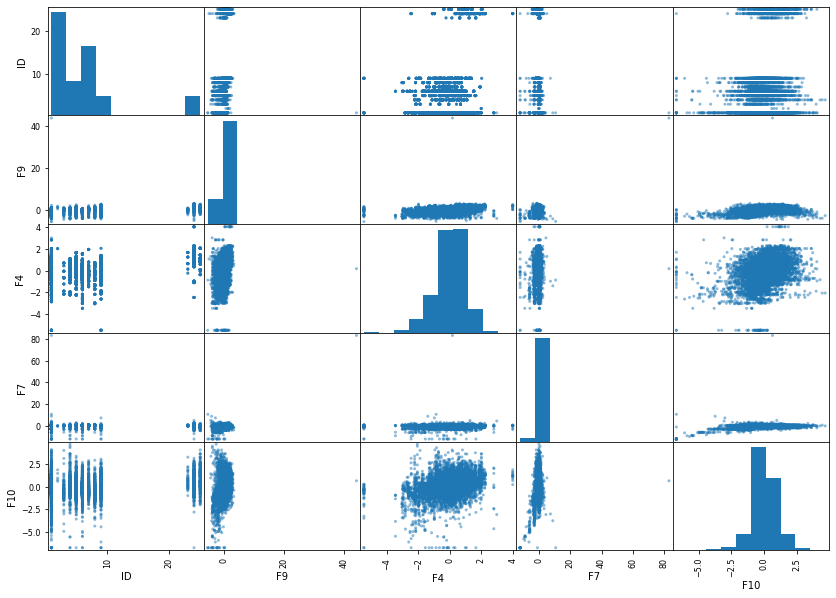

In [15]:
from pandas.plotting import scatter_matrix

attributes = ["ID", "F9", "F4", "F7", "F10"]
scatter_matrix(X_train[attributes], figsize=(14, 10))
plt.show()

# Data preparation

In [16]:
y_train = X_train["ID"].copy()
X_train = X_train.drop("ID", axis=1) # drop labels for training set

In [17]:
y_test = X_test["ID"].copy()
X_test = X_test.drop("ID", axis=1) 

Shuffle the training data:

In [18]:
np.random.seed(42)

shuffle_index = np.random.permutation(X_train.shape[0])
X_train, y_train = X_train.iloc[shuffle_index], y_train.iloc[shuffle_index]

Expecting no empty rows, so no need to impute:

In [19]:
sample_incomplete_rows = X_train[X_train.isnull().any(axis=1)].head()
sample_incomplete_rows

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10


In [20]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


num_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
    ])

X_train_prepared = num_pipeline.fit_transform(X_train)

In [21]:
X_train_prepared.shape

(10430, 10)

# Common functions

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve

def performance_scores(y, y_predict):
    print("Accuracy score:\t\t", accuracy_score(y, y_predict))
    print("Precision score:\t", precision_score(y, y_predict, average='weighted'))
    print("Recall score:\t\t", recall_score(y, y_predict, average='weighted'))   
    print("F1 score:\t\t", f1_score(y, y_predict, average='weighted'))   
    return

In [23]:
import mpl_toolkits.mplot3d.axes3d as p3


def plot_scatter_3d(X3D, y):
    fig = plt.figure()
    ax = p3.Axes3D(fig)

    ax.view_init(20, 220)
    cmap = mpl.cm.get_cmap("rainbow")

    for i in range(0, len(X3D_sample)-1):
        ax.scatter(X3D[i, 0], X3D[i, 1], X3D[i, 2],
                   c=[cmap(y.iloc[i])],
                   s=10)
    plt.show()  
    return

### Random Forest Classifier###

In [24]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

In [25]:
forest_clf.fit(X_train_prepared, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [26]:
y_test_predict = forest_clf.predict(X_test)

In [27]:
performance_scores(y_test, y_test_predict)

Accuracy score:		 0.8267701446775894
Precision score:	 0.8335646008631573
Recall score:		 0.8267701446775894
F1 score:		 0.8282460467190259


**Confusion matrix:**

In [28]:
conf_matrix = confusion_matrix(y_test, y_test_predict)
conf_matrix

array([[3617,    0,    0,   26,   12,  584,   28,   12,    2,    0,    5,
           0],
       [   0,    5,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [  22,    0,   61,   17,    3,    0,    0,    0,    0,    0,    0,
           0],
       [   5,    0,    1,  308,   37,    0,    0,    0,    0,    0,    2,
           0],
       [  83,    0,    1,  101,  873,    9,   13,    1,    0,    0,   14,
           0],
       [ 429,    0,    0,   17,   27, 1433,   29,   27,    0,    0,    0,
           0],
       [  13,    0,    0,    0,    0,   82,  346,    6,    0,    0,    0,
           0],
       [  69,    0,    3,    2,    5,   30,   18,  393,    0,    0,    0,
           0],
       [   8,    0,    0,    0,    0,    0,    0,    0,  824,    0,    0,
           0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,   44,    1,
           0],
       [  10,    0,    0,    0,    7,    1,    0,    0,    0,    0,  496,
           8],
       [   0,    0,  

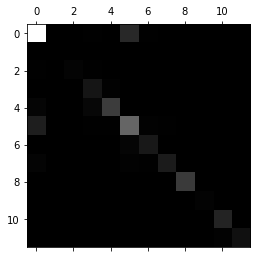

In [29]:
plt.matshow(conf_matrix, cmap=plt.cm.gray)
plt.show()

### Principal Component Analysis (PCA)###

In [30]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3, random_state=42)
X3D = pca.fit_transform(X_train)

About 80% of the variance ratio explained by 3 dimensions:

In [31]:
pca.explained_variance_ratio_

array([0.6455866 , 0.09210314, 0.0658254 ])

Select only a random sample of elements, as the plot is too busy with 10,000 points

In [32]:
percentage_display = 0.1   #between 0 and 1
index = np.random.randint(len(X3D)-1, size=int((len(X3D)) * percentage_display))

X3D_sample = X3D[index, :]

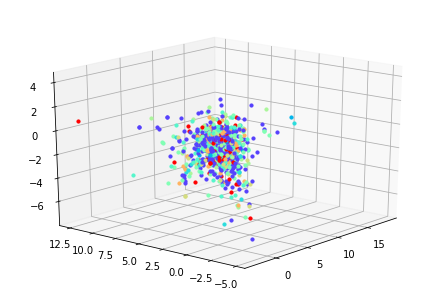

In [33]:
plot_scatter_3d(X3D_sample, y_train[index]/12)

Measure the performance of the forest_clf model with reduced train/test set

In [34]:
forest_clf.fit(X3D, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [35]:
X3D_test = pca.transform(X_test)

In [36]:
y3d_test_predict = forest_clf.predict(X3D_test)

In [37]:
performance_scores(y_test, y3d_test_predict)

Accuracy score:		 0.508287822171122
Precision score:	 0.47569056400049187
Recall score:		 0.508287822171122
F1 score:		 0.47502238426608534


As expected, the performance dropped with the reduced train/test set. 3 dimensions needed for visualization, but we need more dimensions to have similar performance to the original set. Reduce to keep 95% of the variance:

In [38]:
pca = PCA(n_components=0.95, random_state=42)
X_95 = pca.fit_transform(X_train)

In [39]:
pca.n_components_

7

In [40]:
forest_clf.fit(X_95, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [41]:
X95_test = pca.transform(X_test)

In [42]:
y95_test_predict = forest_clf.predict(X95_test)

In [43]:
performance_scores(y_test, y95_test_predict)

Accuracy score:		 0.7505988310817284
Precision score:	 0.7549833663978048
Recall score:		 0.7505988310817284
F1 score:		 0.7427253845550867


Performance reduced with 9%, for 30% reduction in dimensions.

### Locally Linear Embedding (LLE)###

In [44]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=3, n_neighbors=10, random_state=42)

X3D = lle.fit_transform(X_train)

Need a larger percentage than PCA, as LLE is not so busy. LLE has no `explained_variance_ratio_`.

In [45]:
percentage_display = 0.2   #between 0 and 1
index = np.random.randint(len(X3D)-1, size=int((len(X3D)) * percentage_display))

X3D_sample = X3D[index, :]

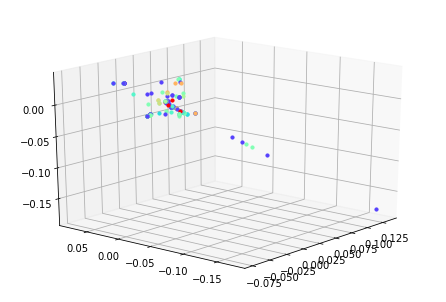

In [46]:
plot_scatter_3d(X3D_sample, y_train[index]/12)

In [47]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)

X2D = lle.fit_transform(X_train)

In [48]:
percentage_display = 1   #between 0 and 1
index = np.random.randint(len(X2D)-1, size=int((len(X2D)) * percentage_display))

X2D_sample = X2D[index, :]

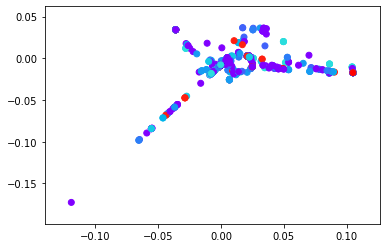

In [49]:
plt.scatter(X2D_sample[:, 0], X2D_sample[:, 1], c=y_train[index]/12,
                         cmap=plt.get_cmap("rainbow"))
plt.show()

### t-Distributed Stochastic Neighbor Embedding (t-SNE)###

In [50]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3, random_state=42)

X3D = tsne.fit_transform(X_train)

In [51]:
percentage_display = 0.1   #between 0 and 1
index = np.random.randint(len(X3D)-1, size=int((len(X3D)) * percentage_display))

X3D_sample = X3D[index, :]

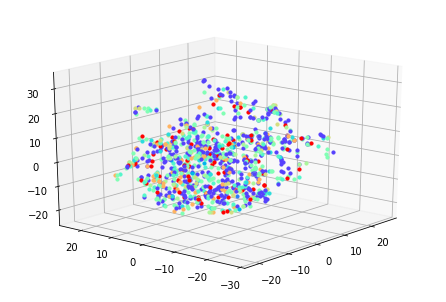

In [52]:
plot_scatter_3d(X3D_sample, y_train[index]/12)

3D Scatter too difficult to visualize, try 2D:

In [53]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)

X2D = tsne.fit_transform(X_train)

In [54]:
percentage_display = 0.3   #between 0 and 1
index = np.random.randint(len(X2D)-1, size=int((len(X2D)) * percentage_display))

X2D_sample = X2D[index, :]

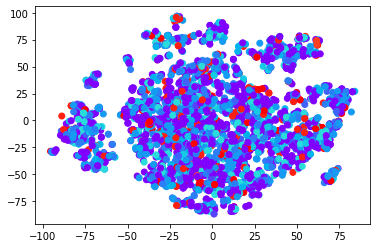

In [55]:
plt.scatter(X2D_sample[:, 0], X2D_sample[:, 1], c=y_train[index]/12,
                         cmap=plt.get_cmap("rainbow"))
plt.show()

Try only for the writers 1, 9 and 24; the confusion matrix of the `RandomForestClassifier` model above, shows that the writer 1 is not confused with the writers 9 and 24. Moreover, all these 3 writers are well represented in the set:

In [56]:
index_writer = (y_train == 1) | (y_train == 9) | (y_train == 24)
X_subset = X_train[index_writer]
y_subset = y_train[index_writer]

X2D_subset = tsne.fit_transform(X_subset)

In [57]:
percentage_display = 0.5   #between 0 and 1
index = np.random.randint(len(X2D_subset)-1, size=int((len(X2D_subset)) * percentage_display))

X2D_sample = X2D_subset[index, :]

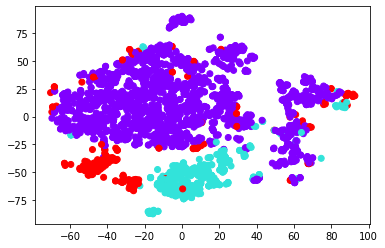

In [58]:
plt.scatter(X2D_sample[:, 0], X2D_sample[:, 1], c=y_subset.iloc[index]/6,
           cmap=plt.get_cmap("rainbow"))
plt.show()

### Swiss Roll ###

Dimesionality reduction on the swiss roll dataset to compare PCA vs. Multidimensional Scalling (MDS):

In [59]:
from sklearn.datasets import make_swiss_roll

X, color = make_swiss_roll(n_samples=1500, random_state=42)

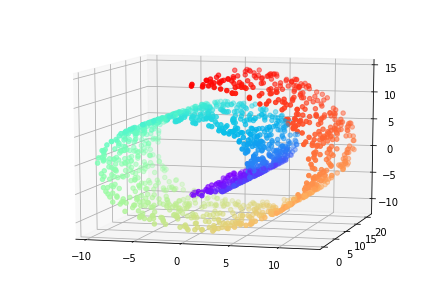

In [60]:
fig = plt.figure()
ax = p3.Axes3D(fig)
ax.view_init(10, -75)

ax.scatter(X[:, 0], X[:, 1], X[:, 2],
           c=color, cmap=plt.get_cmap("rainbow"),
           s=20)

plt.show()

In [61]:
pca = PCA(n_components=2, random_state=42)
X2D = pca.fit_transform(X)

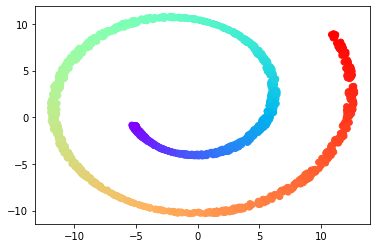

In [62]:
plt.scatter(X2D[:, 0], X2D[:, 1], c=color/np.max(color), cmap=plt.get_cmap("rainbow"))
plt.show()

In [63]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, random_state=42)
X2D = mds.fit_transform(X)

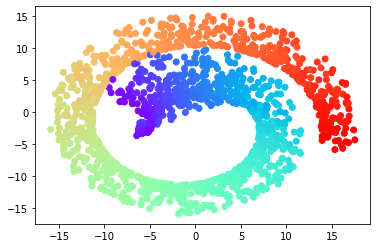

In [64]:
plt.scatter(X2D[:, 0], X2D[:, 1], c=color/np.max(color), cmap=plt.get_cmap("rainbow"))
plt.show()

### Clustering ###

Clustering with Density-Based Spatial Clustering of Applications with Noise (**DBSCAN**):

In [65]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN().fit(X)
label_eps_0point5 = dbscan.labels_

dbscan = DBSCAN(eps=1.4).fit(X)
label_eps_1point4 = dbscan.labels_

In [66]:
def plot_cluster_3d(ax, X, label, alpha=1, title=None):
    ax.view_init(10, -75)

    for l in np.unique(label):
        ax.scatter(X[label == l, 0], X[label == l, 1], X[label == l, 2],
                   color=plt.cm.rainbow(np.float(l) / np.max(label + 1)),
                   s=20, alpha=alpha)
    ax.title.set_text(title)
    return

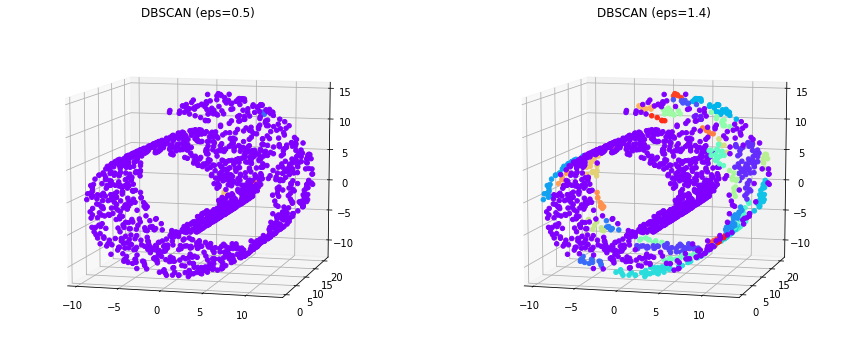

In [67]:
fig = plt.figure(figsize=(15, 6))

#subplot 1
ax = fig.add_subplot(1, 2, 1, projection='3d')
plot_cluster_3d(ax, X, label_eps_0point5, title="DBSCAN (eps=0.5)")

#subplot 2, only the centroids of the clusters
ax = fig.add_subplot(1, 2, 2, projection='3d')
plot_cluster_3d(ax, X, label_eps_1point4, title="DBSCAN (eps=1.4)")

plt.show()

The created swiss roll has an uniform density. DBSCAN is creating the clusters from cores of high density.

Trying clustering with **K-Means**:

In [68]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
X3D = kmeans.fit_predict(X)

In [69]:
label = kmeans.labels_
center = kmeans.cluster_centers_
center

array([[-7.69089324, 10.42062885, -1.31145977],
       [ 4.80810995, 15.83310315, -4.97454868],
       [ 5.34672707,  5.19973392,  6.63506909],
       [ 4.40531371, 16.21845985,  7.92813336],
       [ 4.33917845,  5.07543999, -6.2660875 ]])

In [70]:
def plot_centroids(ax, center):
    ax.scatter(center[:, 0], center[:, 1], center[:, 2],
                marker='x', s=30, color="k", zorder=20)
    return

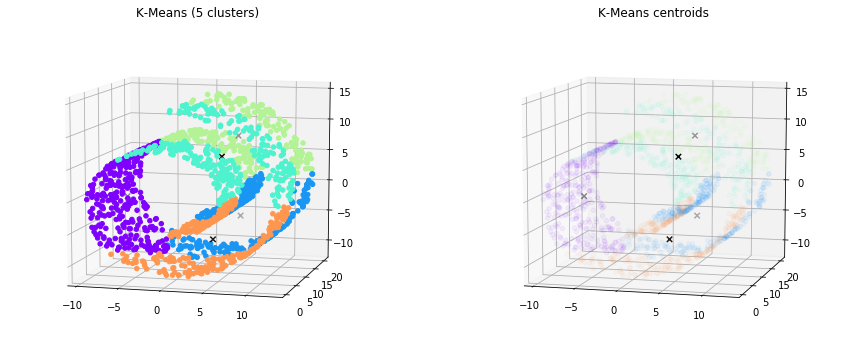

In [71]:
fig = plt.figure(figsize=(15, 6))

#subplot 1
ax = fig.add_subplot(1, 2, 1, projection='3d')
plot_cluster_3d(ax, X, label, title="K-Means (5 clusters)")
plot_centroids(ax, center)

#subplot 2, only the centroids of the clusters
ax = fig.add_subplot(1, 2, 2, projection='3d')
plot_cluster_3d(ax, X, label, alpha = 0.05, title="K-Means centroids")
plot_centroids(ax, center)

plt.show()